# Random Forest Classifier

## The Random Forest Classifier performed the best out of all the models which were run. Specifically, the RFC model utilizing under-sampling, due to imbalanced data. This model is below.

## Install libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

## Read in the data

In [2]:
pd.set_option('display.max_columns', 50)
LLCP2 = pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv')
LLCP2.head()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
0,0.0,6.0,1.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,6.0,1.0,0.0,4.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,6.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,6.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0


In [42]:
LLCP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450016 entries, 0 to 450015
Data columns (total 17 columns):
SEX          450016 non-null float64
_AGE_G       450016 non-null float64
_BMI5CAT     450016 non-null float64
_EDUCAG      450016 non-null float64
_INCOMG      450016 non-null float64
_RFDRHV5     450016 non-null float64
_PACAT1      450016 non-null float64
_RFHLTH      450016 non-null float64
_HCVU651     450016 non-null float64
EMPLOY1      450016 non-null float64
VETERAN3     450016 non-null float64
MARITAL      450016 non-null float64
ADDEPEV2     450016 non-null float64
POORHLTH     450016 non-null float64
PHYSHLTH     450016 non-null float64
MENTHLTH     450016 non-null float64
MENTHLTH2    450016 non-null float64
dtypes: float64(17)
memory usage: 58.4 MB


# Dealing with unbalanced data:

## The data is unbalanced, indicted by two things: 

### (1) MENTHLTH2 value counts show twice as many '0' than '1' rows
### (2) The accuracy scores for the '1' values are far lower than the '0', showing the model is biased. It's good at predicting 'Good Mental Health', but not 'Poor Mental Health'. I ran the Random Forest with class_weight option, giving 'Poor Mental Health' a higher weight. This improved scores a bit, but not by much.

### There are various re-sampling methods for dealing with unbalanced data. We will utilize the 'Under-sampling' technique. This technique drops rows at random from the 'majority class', or the over-represented value. In this case, the '0' rows will be dropped at random until both value's are equal. This can lead to a loss of information, if there is not enough data. Since we have almost 500,000 total rows, this should not be a significant problem. I'll be re-running this with other re-sampling methods in the future for comparison.

0.0    307337
1.0    142679
Name: MENTHLTH2, dtype: int64

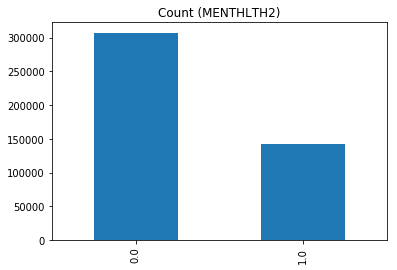

In [3]:
LLCP2.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');
LLCP2['MENTHLTH2'].value_counts()

## First, re-check value counts for the target...you can see twice as many '0' values

In [4]:
# Class count
count_class_0, count_class_1 = LLCP2.MENTHLTH2.value_counts()

# Divide by class
Good_MH = LLCP2[LLCP2['MENTHLTH2'] == 0]
Poor_MH = LLCP2[LLCP2['MENTHLTH2'] == 1]

## Now, we want to divide the target by value

Random under-sampling:
1.0    142679
0.0    142679
Name: MENTHLTH2, dtype: int64


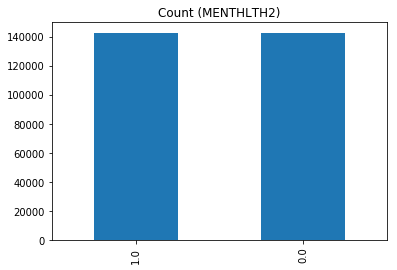

In [5]:
Good_MH_under = Good_MH.sample(count_class_1)
LLCP2_under = pd.concat([Good_MH_under, Poor_MH], axis=0)

print('Random under-sampling:')
print(LLCP2_under.MENTHLTH2.value_counts())

LLCP2_under.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');

### You can see above that we now have an equal amount of observations for both values of the target MENTHLTH2. We did lose a lot of information using this method, however, we still have a pretty large dataset to work with.

# Under-Sampled Model

## Let's re-run the model now

In [6]:
X_under = LLCP2_under[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1',
           'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y_under = LLCP2_under['MENTHLTH2'].values

In [7]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

# describes info about train and test set 
print("Number of rows/columns in X_test_under dataset: ", X_test_under.shape) 
print("Number of rows/columns in y_test_under dataset: ", y_test_under.shape) 
print("Number of rows/columns in X_train_under dataset: ", X_train_under.shape) 
print("Number of rows/columns in y_train_under dataset: ", y_train_under.shape) 

Number of rows/columns in X_test_under dataset:  (85608, 15)
Number of rows/columns in y_test_under dataset:  (85608,)
Number of rows/columns in X_train_under dataset:  (199750, 15)
Number of rows/columns in y_train_under dataset:  (199750,)


In [10]:
unique, counts = np.unique(y_train_under, return_counts=True)
dict(zip(unique, counts))

{0.0: 99974, 1.0: 99776}

In [28]:
# class sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, 
    # min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, 
        # max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
            # oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None

RFC_under = RandomForestClassifier(n_estimators=200, random_state=0)
RFC_under.fit(X_train_under, y_train_under)
y_pred = RFC_under.predict(X_test_under)   #yields predicted class 0/1
probs = RFC_under.predict_proba(X_test_under)
probs = probs[:,1]    #yields probability of either class 0-1

=== Confusion Matrix ===
[[32549 10156]
 [14769 28134]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72     42705
         1.0       0.73      0.66      0.69     42903

   micro avg       0.71      0.71      0.71     85608
   macro avg       0.71      0.71      0.71     85608
weighted avg       0.71      0.71      0.71     85608



Accuracy: 0.7088473039902813
F1_score: 0.6930154077321936
Recall_score: 0.6557583385777218
AUC score: 0.77043848758759
Log Loss: 10.05615272351474
[[32549 10156]
 [14769 28134]]
Sensitivity 0.6557583385777218
Specificity 0.7621824142372088
Precision 0.7347610342125881


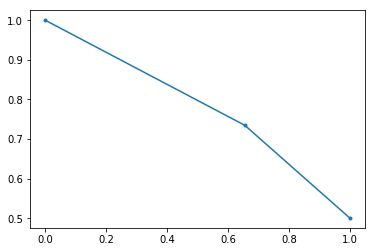

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_under, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test_under, y_pred))
print('\n')
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_under, y_pred))
print("F1_score:",metrics.f1_score(y_test_under, y_pred))
print("Recall_score:",metrics.recall_score(y_test_under, y_pred))
print("AUC score:",metrics.roc_auc_score(y_test_under, probs))
print("Log Loss:",metrics.log_loss(y_test_under, y_pred, eps=1e-15))
precision, recall, thresholds = metrics.precision_recall_curve(y_test_under, y_pred)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(recall, precision, marker='.')
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test_under, y_pred)
print(confusion)

# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
print("Sensitivity",TP / float(TP + FN))
print("Specificity",TN / float(TN + FP))
print("Precision",TP / float(TP + FP))

### Confusion matrix shows that:
#### True positive:    32549     _(We predicted a positive result and it was positive)_
#### True negative:    28134     _(We predicted a negative result and it was negative)_
#### False positive:   10156      _(We predicted a positive result and it was negative)_
#### False negative:   14769     _(We predicted a negative result and it was positive)_

### So, this model makes more correct predictions, than not and the false negative rate seems a bit higher than the false positive

## Now, let's run a ROC plot and get the area under the curve score (AUC)

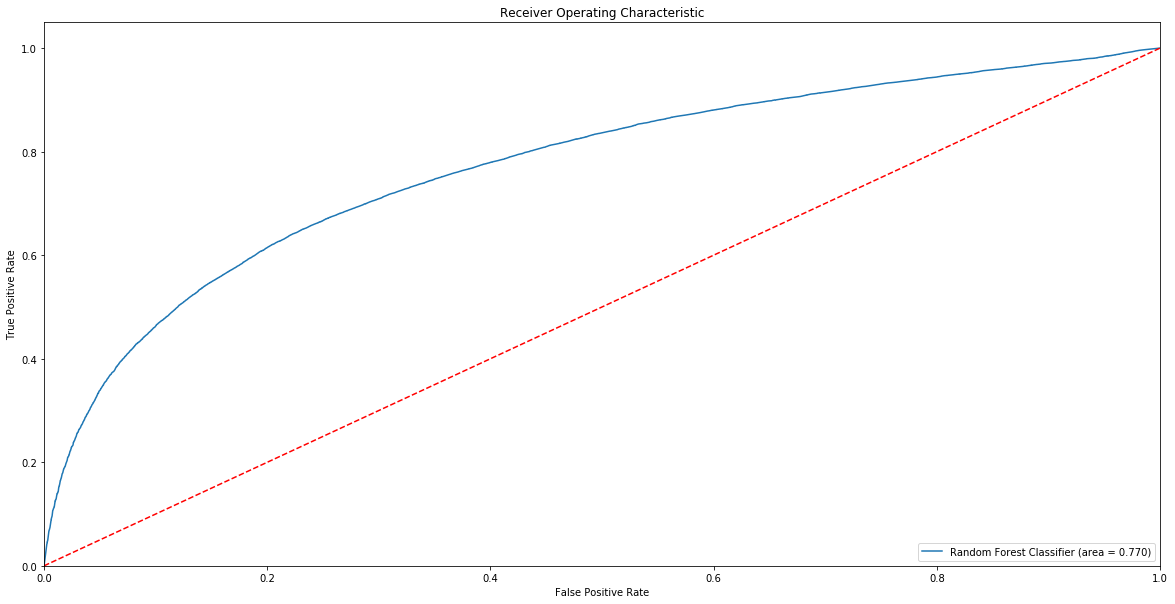

AUC: 0.770


In [22]:
roc_auc = roc_auc_score(y_test_under, probs)
fpr, tpr, thresholds = roc_curve(y_test_under, probs)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()
print('AUC: %.3f' % roc_auc)

Feature ranking:
1. feature 14 (0.197392)
2. feature 13 (0.188712)
3. feature 12 (0.155579)
4. feature 1 (0.105599)
5. feature 4 (0.085912)
6. feature 6 (0.081539)
7. feature 7 (0.027895)
8. feature 2 (0.024811)
9. feature 3 (0.024339)
10. feature 0 (0.023643)
11. feature 9 (0.022898)
12. feature 11 (0.022186)
13. feature 10 (0.013925)
14. feature 8 (0.013370)
15. feature 5 (0.012200)


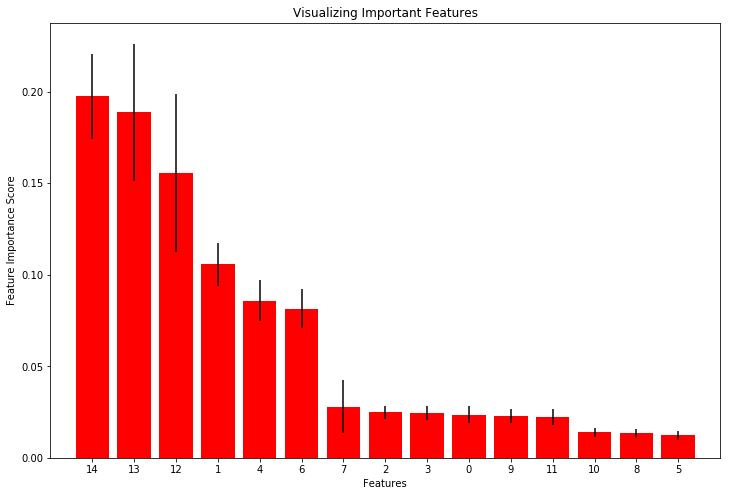

In [41]:
importances = RFC_under.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC_under.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_under.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Visualizing Important Features")
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.bar(range(X_under.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_under.shape[1]), indices)
plt.xlim([-1, X_under.shape[1]])
plt.show()